C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.1517 - val_loss: 0.0726
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0274 - val_loss: 0.0427
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0173 - val_loss: 0.0087
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0075 - val_loss: 0.0080
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0054 - val_loss: 0.0074
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0053 - val_loss: 0.0104
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0057 - val_loss: 0.0068


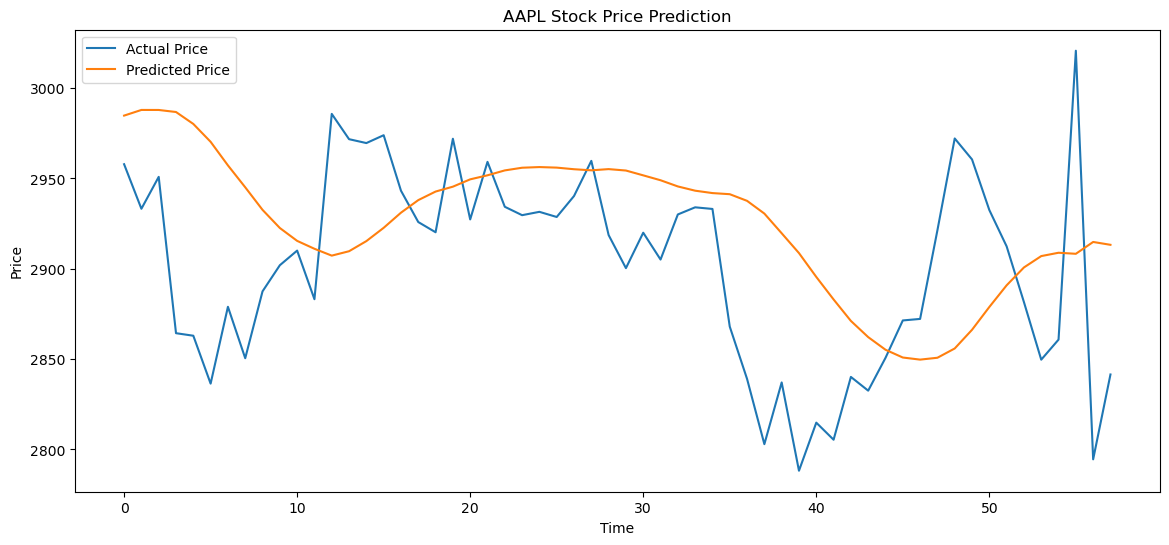

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Load Data
ticker = 'RELIENCE'  # You can change to any stock
# df = yf.download(ticker, start='2015-01-01', end='2024-12-31')
df = pd.read_csv("D_RELIANCE1.csv")
df = df[['Close']]
df.dropna(inplace=True)

# 2. Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 3. Create sequences for LSTM
def create_sequences(data, window_size):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(x), np.array(y)

window_size = 60
x, y = create_sequences(scaled_data, window_size)

# 4. Train-Test Split
split = int(len(x) * 0.8)
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

# 5. Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train Model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# 7. Make Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 8. Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# 9. Plot Results
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [4]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.
